**Transfer learning in image classification**


In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. 
Using pre-trained model saves lot of time and computational budget for new classification problem at hand

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Make predictions using ready made model (without any training)

In [ ]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

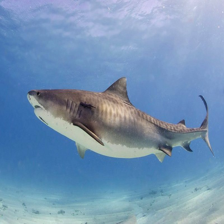

In [ ]:
ts = Image.open("ts.jpg").resize(IMAGE_SHAPE)
ts

In [ ]:
#colour scale is 255

ts = np.array(ts)/255.0
ts.shape


(224, 224, 3)

In [ ]:
ts

array([[[0.4627451 , 0.58431373, 0.76470588],
        [0.48627451, 0.58431373, 0.77254902],
        [0.50196078, 0.58039216, 0.78431373],
        ...,
        [0.76470588, 0.78431373, 0.87058824],
        [0.77254902, 0.78823529, 0.88235294],
        [0.77647059, 0.78431373, 0.88235294]],

       [[0.47843137, 0.58431373, 0.76470588],
        [0.50588235, 0.59607843, 0.78823529],
        [0.57647059, 0.64705882, 0.84705882],
        ...,
        [0.75294118, 0.77254902, 0.8627451 ],
        [0.76862745, 0.78039216, 0.87843137],
        [0.76470588, 0.77254902, 0.87058824]],

       [[0.53333333, 0.62352941, 0.81176471],
        [0.56078431, 0.63529412, 0.83137255],
        [0.60392157, 0.65882353, 0.8627451 ],
        ...,
        [0.75686275, 0.77647059, 0.87058824],
        [0.75294118, 0.76862745, 0.86666667],
        [0.76078431, 0.76862745, 0.86666667]],

       ...,

       [[0.68627451, 0.79607843, 0.78431373],
        [0.70588235, 0.80392157, 0.79215686],
        [0.70588235, 0

In [ ]:
ts[np.newaxis, ...].shape


(1, 224, 224, 3)

In [ ]:
result = classifier.predict(ts[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
result


array([[ 0.27090064,  2.7649906 ,  0.38740146, ..., -0.7816363 ,
        -0.7425808 ,  0.3145519 ]], dtype=float32)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

4

In [ ]:
# tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'tiger shark'

Now, using the above dataset and appplying TL technique and prediciting the flower dataset

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/daisy/4668543441_79040ca329_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/13901930939_a7733c03f0_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4318007511_e9f4311936_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/6089825811_80f253fbe1.jpg'),
 PosixPath('datasets/flower_photos/daisy/2349640101_212c275aa7.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/4900231976_f8ced2b42a_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8590442797_07fa2141c0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5050969148_a0090f762a.jpg'),
 PosixPath('datasets/flower_photos/roses/12323085443_8ac0cdb713_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17040847367_b54d05bf52.jpg')]

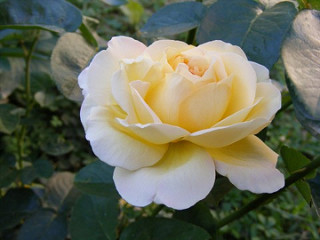

In [ ]:
Image.open(str(roses[0]))

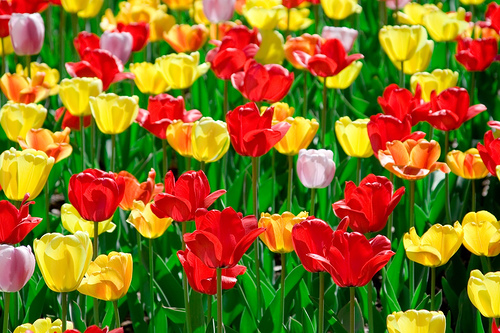

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
Image.open(str(tulips[3]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
#Read flowers images from disk into numpy array using opencv

img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [ ]:
img

array([[[71, 82, 49],
        [68, 82, 48],
        [64, 79, 47],
        ...,
        [ 0, 78, 51],
        [ 2, 84, 55],
        [ 4, 86, 57]],

       [[66, 77, 45],
        [60, 72, 42],
        [56, 68, 38],
        ...,
        [ 6, 89, 64],
        [ 9, 90, 63],
        [ 4, 86, 57]],

       [[54, 63, 37],
        [51, 60, 34],
        [44, 54, 31],
        ...,
        [13, 96, 74],
        [13, 95, 72],
        [ 5, 88, 63]],

       ...,

       [[12, 19, 14],
        [12, 19, 14],
        [10, 16, 11],
        ...,
        [67, 88, 66],
        [60, 78, 55],
        [47, 63, 39]],

       [[ 6, 16, 10],
        [ 8, 18, 12],
        [10, 17, 12],
        ...,
        [55, 76, 54],
        [53, 72, 51],
        [46, 66, 43]],

       [[ 3, 15,  9],
        [ 8, 18, 12],
        [12, 19, 14],
        ...,
        [39, 60, 38],
        [42, 62, 43],
        [40, 62, 43]]], dtype=uint8)

In [ ]:
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:

X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:

#Preprocessing: scale images

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
#Make prediction using pre-trained model on new flowers dataset



In [ ]:
X[0].shape

(224, 224, 3)

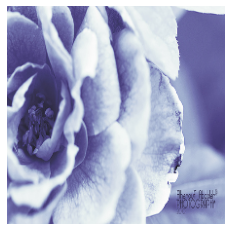

In [ ]:
plt.axis("off")
plt.imshow(X[2])

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[66], IMAGE_SHAPE)

In [ ]:
x0_resized

array([[[70, 82, 49],
        [65, 79, 47],
        [59, 75, 45],
        ...,
        [ 1, 82, 57],
        [ 1, 80, 53],
        [ 3, 86, 57]],

       [[63, 74, 43],
        [56, 68, 38],
        [49, 63, 35],
        ...,
        [ 7, 89, 66],
        [ 8, 90, 65],
        [ 5, 87, 59]],

       [[51, 60, 35],
        [45, 55, 32],
        [43, 52, 30],
        ...,
        [ 9, 92, 73],
        [13, 95, 73],
        [ 7, 90, 66]],

       ...,

       [[13, 20, 15],
        [11, 18, 12],
        [10, 13,  8],
        ...,
        [60, 89, 69],
        [64, 84, 62],
        [49, 65, 41]],

       [[ 7, 17, 11],
        [ 9, 17, 12],
        [ 9, 15, 10],
        ...,
        [47, 75, 55],
        [55, 76, 54],
        [48, 67, 44]],

       [[ 4, 16, 10],
        [10, 18, 13],
        [11, 17, 12],
        ...,
        [31, 58, 38],
        [40, 61, 40],
        [40, 62, 43]]], dtype=uint8)

In [ ]:

predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)#argmax gives the max arg
predicted

array([722, 722, 795])

In [ ]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:

image_labels[795]

'shower curtain'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
